<a href="https://colab.research.google.com/github/zangatec/E16/blob/main/MNA_IAyAA_semana_8_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Andrea Carolina Treviño Garza A01034993
*   David Winterman Hemilson A00919441
*   Pedro Ulises Meléndez Ortega A00716301
*   José David Hernández Navarro A01793121


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [97]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, SCORERS, RocCurveDisplay, roc_curve
from imblearn.metrics import geometric_mean_score

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#**Ejercicio-1.** 

In [98]:
#Se guardar archivo "australian.dat" en dataframe df.
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat",delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [99]:
df.columns=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [100]:
#Se revisa tamaño de conjunto
df.shape

(690, 15)

In [101]:
#Se valida que no haya datos vacíos.
df.isnull().any()

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
dtype: bool

In [102]:
#Se definen las variables de entrada y salida:
X = df.iloc[:, 0:14:1]
Y = df.iloc[:,-1:]

print(X.shape)
print(Y.shape)

(690, 14)
(690, 1)


In [103]:
#Se comprueban variables de entrada:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


In [104]:
#Se comprueba variable de Salida:
Y.head()

,A15
0,0
1,0
2,0
3,1
4,1


In [105]:
#Se realiza la partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación.

Xtv, Xtest, Ytv, Ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=0) 
Xtv.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
27,1,33.17,3.040,1,8,8,2.04,1,1,1,1,2,180,18028
109,1,32.33,2.500,2,8,4,1.25,0,0,0,1,2,280,1
538,0,35.42,12.000,2,11,8,14.00,1,1,8,0,2,0,6591
464,0,57.58,2.000,2,1,1,6.50,0,1,1,0,2,0,11
24,1,19.50,9.585,2,6,4,0.79,0,0,0,0,2,80,351


In [106]:
#Se valida que partición se haya realizado correctamente:
print(Xtv.shape)
print(Ytv.shape)
print(Xtest.shape)
print(Ytest.shape)

(586, 14)
(586, 1)
(104, 14)
(104, 1)


#**Ejercicio-2.**

In [107]:
#Analizamos los tipos de variables en nuestro conjunto de entrada Xtv
Xtv.dtypes

A1       int64
A2     float64
A3     float64
A4       int64
A5       int64
A6       int64
A7     float64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14      int64
dtype: object

In [108]:
# Se identifican los tipos de variables en conjunto de entrenamiento:

variables_categoricas = ["A1", "A4", "A5", "A6", "A8", "A9", "A11", "A12"]
variables_numericas = ["A2", "A3", "A7", "A10", "A13", "A14"]

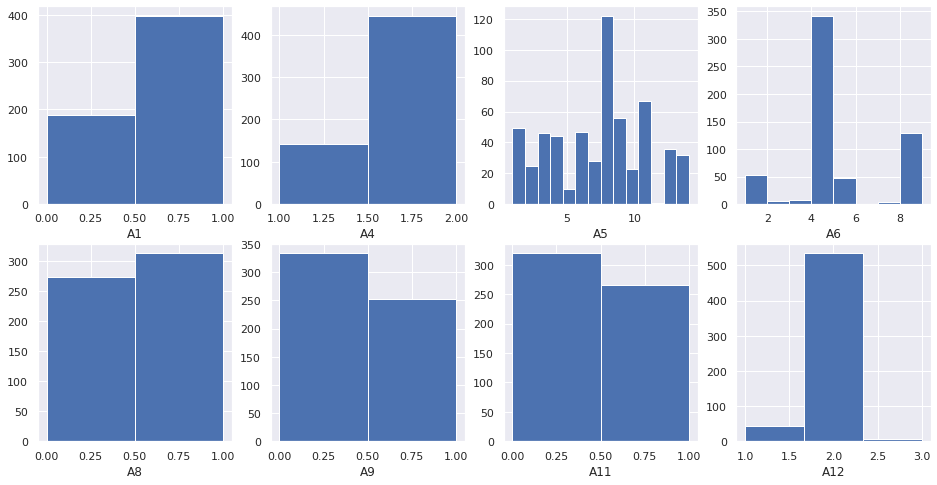

In [109]:
#Se visualizan las variables categóricas identificadas:

sns.set(rc= {'figure.figsize': (16,8)})
fig, axes = plt.subplots(2, 4)
for k in range(0,8):
  plt.subplot(2, 4,k+1)
  plt.hist(Xtv[variables_categoricas[k]], bins = len(Xtv[variables_categoricas[k]].value_counts()))
  plt.xlabel(variables_categoricas[k])
plt.show()

* Se observa que en las variables A4, A5, A6 y A12 (hay categorías con muy poca cantidad de datos).

In [110]:
#Se valida la cantidad en cada categoria para estas variables:
Xtv["A12"].value_counts()

2    535
1     44
3      7
Name: A12, dtype: int64

In [111]:
#Por lo que se definen funciones para juntar categorias con menor cantidad de datos, se agrupan en un mismo nivel 0 todos los de baja frecuencia:
def mapA4(df):
  df["A4"] = df["A4"].map({2:2, 1:0, 3:0})
  return df

def mapA5(df):
  df["A5"] = df["A5"].map({8:8, 11:11, 9:9, 3:3, 1:1, 6:6, 4:4, 13:13, 7:7, 14:14, 2:2, 10:0, 5:0, 12:0})
  return df

def mapA6(df):
  df["A6"] = df["A6"].map({4:4, 8:8, 5:5, 1:1, 3:0, 9:0, 2:0, 7:0})
  return df

def mapA12(df):
  df["A12"] = df["A12"].map({2:2, 1:0, 3:0})
  return df

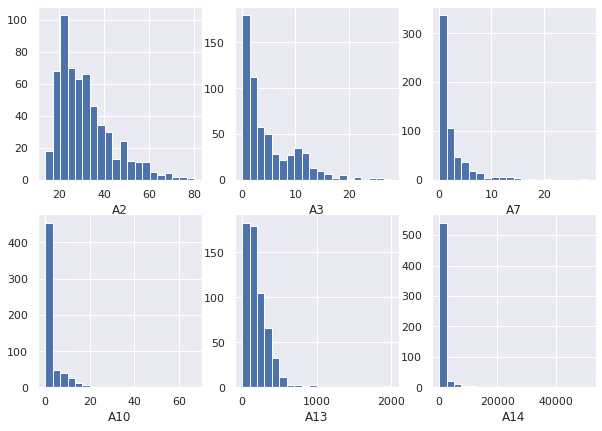

In [112]:
#Se visualiza la distribución de las variables numéricas: 

sns.set(rc= {'figure.figsize': (10,7)})
fig, axes = plt.subplots(2, 3)
for k in range(0,6):
  plt.subplot(2, 3,k+1)
  plt.hist(Xtv[variables_numericas[k]], bins = 20)
  plt.xlabel(variables_numericas[k])
plt.show()

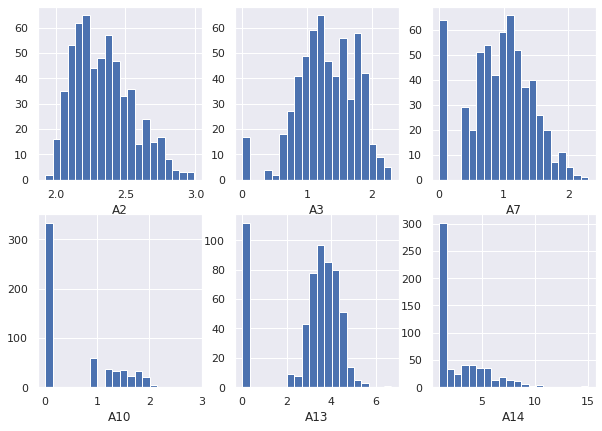

In [113]:
#Se revisa la n-raiz requerida para ajustar el sesgo positivo que presentan las variables numéricas: 
n = 4
sns.set(rc= {'figure.figsize': (10,7)})
fig, axes = plt.subplots(2, 3)
for k in range(0,6):
  plt.subplot(2, 3,k+1)
  plt.hist(np.power(Xtv[variables_numericas[k]], (1/n)), bins = 20)
  plt.xlabel(variables_numericas[k])
plt.show()

In [114]:
#Se selecciona la raíz a la n=4 para ajustar variables numéricas, por lo que se genera función:

def funNum(x):
  raizN4 = np.power(x, (1/4))
  return raizN4

In [115]:
#Transformaciones a variables numéricas de entrada:
num_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                              ('escalaNum', MinMaxScaler(feature_range=(0,1)))])   
num_pipe_nombres = variables_numericas

numRaizN4_pipe = Pipeline(steps = [('raizN4', FunctionTransformer(funNum))]) 
numRaizN4_pipe_nombre = variables_numericas

#Transformaciones a variables categóricas de entrada:
catMapA4_pipe = Pipeline(steps = [('mapCatA4', FunctionTransformer(mapA4))])
catMapA4_pipe_nombre = ['A4']

catMapA5_pipe = Pipeline(steps = [('mapCatA5', FunctionTransformer(mapA5))])
catMapA5_pipe_nombre = ['A5']

catMapA6_pipe = Pipeline(steps = [('mapCatA6', FunctionTransformer(mapA6))])
catMapA6_pipe_nombre = ['A6']

catMapA12_pipe = Pipeline(steps = [('mapCatA12', FunctionTransformer(mapA12))])
catMapA12_pipe_nombre = ['A12']

catOhe_pipe = Pipeline(steps = [('oheCat', OneHotEncoder(handle_unknown="ignore", sparse=False))])
catOhe_pipe_nombre = [ 'A4','A5','A6','A12']




#Se conjuntan todas las transformaciones para las variables de entrada:
cT = ColumnTransformer(transformers = [('numpipe', num_pipe, num_pipe_nombres),
                                       ('numRaizN4', numRaizN4_pipe, numRaizN4_pipe_nombre),
                                       ('catMapA4', catMapA4_pipe, catMapA4_pipe_nombre),
                                       ('catMapA5', catMapA5_pipe, catMapA5_pipe_nombre),
                                       ('catMapA6', catMapA6_pipe, catMapA6_pipe_nombre),
                                       ('catMapA12', catMapA12_pipe, catMapA12_pipe_nombre),
                                       ('catOhe', catOhe_pipe, catOhe_pipe_nombre)],
                        remainder='passthrough')

#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso?

In [116]:
#Se obtiene modelo Dummy con estrategia "stratified":

modeloDummy = DummyClassifier(strategy="stratified")
pipelineDummy = Pipeline(steps=[('ct', cT),  ('m', modeloDummy)])

pipelineDummy.fit(Xtv, Ytv)

yhatDummy = pipelineDummy.predict(Xtv)

print('Accuracy score: %.4f' % pipelineDummy.score(Xtv, Ytv))
print('F1-score score: %.4f' % f1_score(Ytv, yhatDummy))
print('Precision score: %.4f' % precision_score(Ytv, yhatDummy))
print('Recall score: %.4f' % recall_score(Ytv, yhatDummy))

Accuracy score: 0.5137
F1-score score: 0.4749
Precision score: 0.4786
Recall score: 0.4713


“stratified”: the predict_proba method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The predict method returns the class label which got probability one in the one-hot vector of predict_proba. Each sampled row of both methods is therefore independent and identically distributed.

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio
anterior.

In [117]:
#Se utiliza GridSearch para encontrar los mejores hiperparámetros con el modelo SVM.

modeloSVM = svm.SVC(probability=True)

pipelineSVM = Pipeline(steps=[("ct", cT),("m",modeloSVM)])

cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#param_C = np.logspace(-3,3,6)
param_Gamma = np.linspace(0.05, 50, 8) #[0.05,0.1,10,50]

dicc_gridSVM = {'m__kernel':['rbf', 'linear'],
                'm__C':[0.001,0.01,0.1,1,10,100],
                'm__gamma': param_Gamma,
                 }

gridSVM = GridSearchCV(estimator = pipelineSVM,
                      param_grid= dicc_gridSVM,
                      cv=cv1,
                      scoring = 'f1',
                      n_jobs=-1)

In [118]:
gridSVM.fit(Xtv, Ytv.values.ravel())

print('Mejor valor de RMSE obtenido con la mejor combinación:', gridSVM.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', gridSVM.best_params_)
print('Métrica utilizada:', gridSVM.scoring)

Mejor valor de RMSE obtenido con la mejor combinación: 0.8474420422217553
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.1, 'm__gamma': 0.05, 'm__kernel': 'linear'}
Métrica utilizada: f1


In [119]:
#Se obtienen métricos considerando los mejores parámetros obtenidos con GridSearchCV:

best_SVMparams = pipelineSVM.set_params(**gridSVM.best_params_)
best_SVM = best_SVMparams.fit(Xtv, Ytv.values.ravel())
yhatSVM = best_SVM.predict(Xtv)

print('Accuracy score: %.4f' % best_SVM.score(Xtv, Ytv))
print('F1-score score: %.4f' % f1_score(Ytv, yhatSVM))
print('Precision score: %.4f' % precision_score(Ytv, yhatSVM))
print('Recall score: %.4f' % recall_score(Ytv, yhatSVM))

Accuracy score: 0.8532
F1-score score: 0.8502
Precision score: 0.7796
Recall score: 0.9349


In [120]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas.
Incluye tus conclusiones.

In [121]:
#Se obtienen los gráficos de caja del modelo SVM con los mejores parámetros con los métricos de accuracy, f1-score, precision y recall.

results_Metrics = list()
metric = {'Accuracy':'accuracy', 'Precision':'precision', 'Recall':'recall', 'F1':'f1'}
            
scores = cross_validate(pipelineSVM, 
                        Xtv, np.ravel(Ytv),
                        scoring=metric,
                        cv = cv1,
                        return_train_score=True,
                        n_jobs=-1)
  
results_Metrics.append(scores)

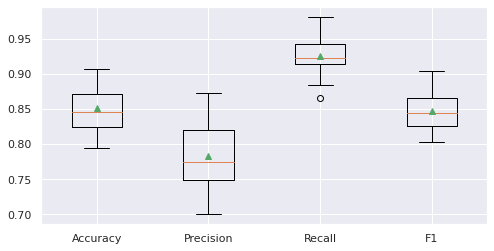

In [122]:
sns.set(rc={'figure.figsize':(8,4)})
bpMetrics = list()
for i in range(len(results_Metrics)):
  r1 = results_Metrics[i]["test_Accuracy"]
  bpMetrics.append(r1)
  r2 = results_Metrics[i]["test_Precision"]
  bpMetrics.append(r2)
  r3 = results_Metrics[i]["test_Recall"]
  bpMetrics.append(r3)
  r4 = results_Metrics[i]["test_F1"]
  bpMetrics.append(r4)
plt.boxplot(bpMetrics, labels = metric, showmeans = True)
plt.show()

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento,
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno
de estos problemas.

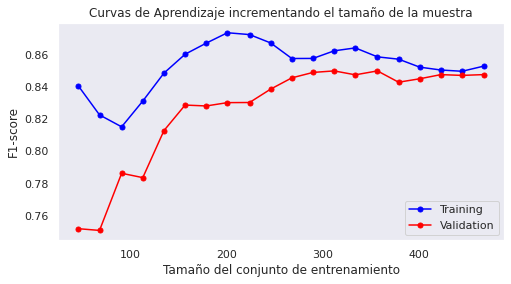

In [123]:
#Curva de aprendizaje aumentando el conjunto de entreanmiento:

delta_train = np.linspace(0.1, 1.0, 20)

train_sizes, train_scores, valid_scores = learning_curve(estimator= best_SVMparams, 
                                                         X=Xtv, 
                                                         y=np.ravel(Ytv),
                                                         cv=cv1, 
                                                         train_sizes=delta_train,
                                                         scoring='f1')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1-score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

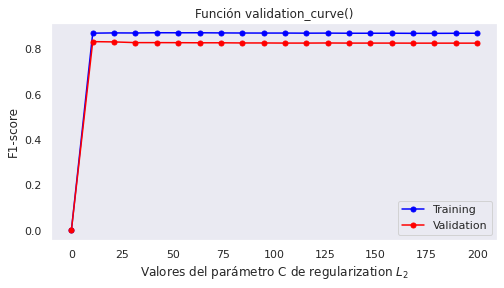

In [124]:
#Curva de aprendizaje considerando que aumenta la complejidad del modelo en este caso el parámetro C:
delta_C = np.linspace(.0001, 200.0, 20)

train_scores, valid_scores = validation_curve(best_SVMparams, 
                                              Xtv, 
                                              np.ravel(Ytv), 
                                              param_name="m__C", 
                                              param_range=delta_C,
                                              cv=cv1,
                                              scoring='f1')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro C de regularization $L_2$')
plt.ylabel('F1-score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Claramente subentrenado.

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la
curva.

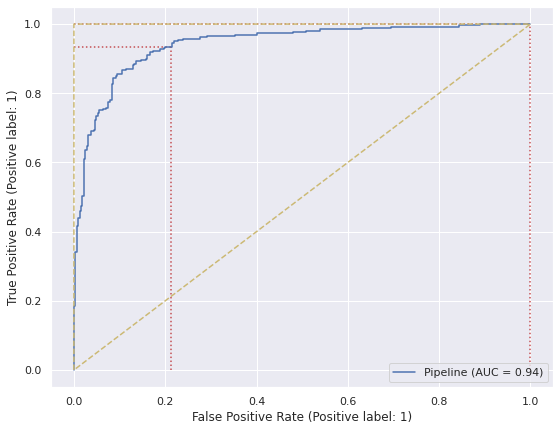

In [125]:
sns.set(rc={'figure.figsize':(9,7)}) 

fpr, tpr, _ = roc_curve(Ytv, yhatSVM)

RocCurveDisplay.from_estimator(best_SVM, Xtv, Ytv)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

In [126]:
tpr

array([0.       , 0.9348659, 1.       ])

In [127]:
fpr

array([0.        , 0.21230769, 1.        ])

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica
f1-score.

In [176]:
# regresa los TP para un umbral deseado:

def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y["A15"]==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

In [178]:
fun_thTPrate(0.5, best_SVM, Xtv, Ytv)

0.9348659003831418

In [177]:
# Análogo ahora con los FP:

def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y["A15"]==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

In [179]:
fun_thFPrate(0.5, best_SVM, Xtv, Ytv)

0.2123076923076923

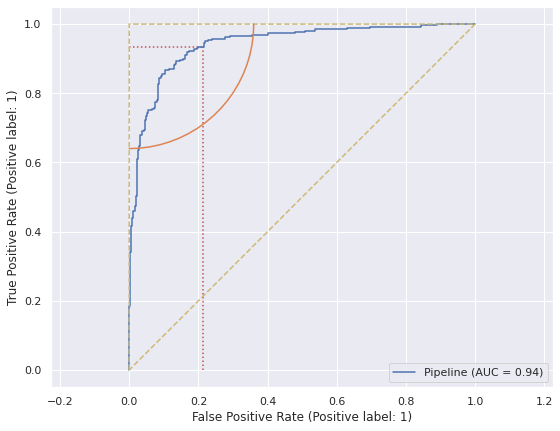

In [187]:
new_th = 0.25 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.36   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th, best_SVM, Xtv, Ytv)
new_FPrate = fun_thFPrate(new_th, best_SVM, Xtv, Ytv)

RocCurveDisplay.from_estimator(best_SVM, Xtv, Ytv)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

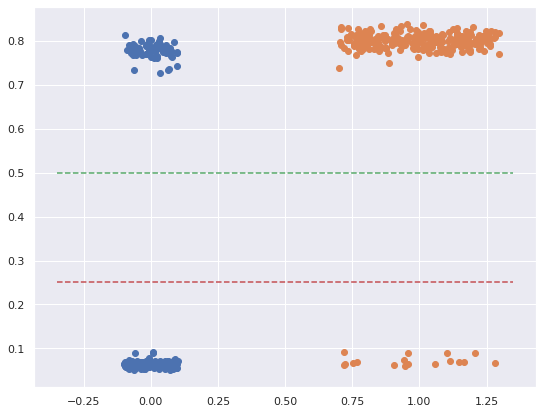

In [202]:
r0 = np.random.uniform(-0.1,0.1, size=pred0s.shape[0])    

r1 = np.random.uniform(0.7,1.3, size=pred1s.shape[0]) 

plt.scatter(x=r0, y=pred0s)
plt.scatter(x=r1, y=pred1s)
plt.hlines(0.5, -0.35,1.35,color='g',linestyles='dashed')
plt.hlines(new_th, -0.35,1.35,color='r',linestyles='dashed')
plt.show()

In [186]:
f1_score(Ytv, yhatSVM)

0.8501742160278746

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.

#**Ejercicio-10.**

Incluye tus conclusiones finales de la actividad.

In [ ]:
None

###**Fin de la Actividad de la semana 8.**